1. Загрузите датасет 20 newsgroups; + 5. Разделите эти данные на тестовую и обучающую выборки;

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
news = fetch_20newsgroups(subset = 'all')
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='train')

2. Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации.

In [3]:
print(news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

3. Выведите информацию о количественных параметрах датасета;

In [4]:
print(list(newsgroups_train.target_names))
print(len(list(newsgroups_train.target_names)))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
20


In [5]:
# Сами данные лежат тут: 
newsgroups_train.filenames.shape

(11314,)

In [6]:
# Обучающий вектор с отмеченными классами:
print(newsgroups_train.target.shape)
# Посмотрим на первые 10
print(newsgroups_train.target[:10])

(11314,)
[ 7  4  4  1 14 16 13  3  2  4]


4. Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной);

In [7]:
print(newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [8]:
# Относится к категории
newsgroups_train.target[0]

7

In [9]:
print(newsgroups_train.data[1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [10]:
# Относится к категории
newsgroups_train.target[1]

4

6. Постройте модель наивного байесовского для классификации текстов;

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(11314, 101631)

In [85]:
# Введем стоп слова
vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(11314, 101322)

Для себя про average:

- 'micro' [default]: Calculate the metric globally, across all samples and classes.

- 'macro': Calculate the metric for each class separately, and average the metrics across classes (with equal weights for each class).

- 'weighted': Calculate the metric for each class separately, and average the metrics across classes, weighting each class by its support (tp + fn).

- 'none' or None: Calculate the metric for each class separately, and return the metric for every class.

- 'samples': Calculate the metric for each sample, and average the metrics across samples (with equal weights for each sample).

In [88]:
# Уберем заголовки, подписи и цитаты
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data)
print(vectors.shape)

clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)
vectors_test = vectorizer.transform(newsgroups_test.data)
pred_1 = clf.predict(vectors_test)
metrics.f1_score(newsgroups_test.target, pred_1, average='macro')

(11314, 101322)


0.9613055669895587

In [76]:
# Посмотрим на топ-10 слов у каждого класса
import numpy as np
def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.feature_log_prob_[i])[-10:]
        print("%s: %s" % (category, " ".join(feature_names[top10])))

In [77]:
show_top10(clf, vectorizer, newsgroups_train.target_names)

alt.atheism: islam atheists say just religion atheism think don people god
comp.graphics: looking format 3d know program file files thanks image graphics
comp.os.ms-windows.misc: card problem thanks driver drivers use files dos file windows
comp.sys.ibm.pc.hardware: monitor disk thanks pc ide controller bus card scsi drive
comp.sys.mac.hardware: know monitor does quadra simms thanks problem drive apple mac
comp.windows.x: using windows x11r5 use application thanks widget server motif window
misc.forsale: asking email sell price condition new shipping offer 00 sale
rec.autos: don ford new good dealer just engine like cars car
rec.motorcycles: don just helmet riding like motorcycle ride bikes dod bike
rec.sport.baseball: braves players pitching hit runs games game baseball team year
rec.sport.hockey: league year nhl games season players play hockey team game
sci.crypt: people use escrow nsa keys government chip clipper encryption key
sci.electronics: don thanks voltage used know does lik

C:\Users\kupri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


7. Оцените качество модели на тестовой выборке с помощью следующих метрик:
- достоверность предсказания (accuracy);
- точность (precision);
- полнота (recall);

In [63]:
from sklearn.metrics import classification_report

Интерпритация:
- precision: % правильно предсказынных классов текстов к общему числу тестов, отнесенных моделью к этой категории
<br> <ins>Пример</ins>: сколько текстов, отнесенных к alt.atheism, действительно относятся к alt.atheism? </br>
- recall: % текстов данной категории, которые были отнесены к ней (правильно классифицированы)
<br> <ins>Пример</ins>: сколько текстов, реально относящихся к alt.atheism, были классфицированы моделью, как alt.atheism? </br>
- accuracy: общая точность предсказания модели по всем классам. Отношение количества правильных прогнозов (правильно предсказанных классов {тем} текстов) к их общему количеству (сколько всего прогнозов было сделано = размер тестовой выборки)
<br> <ins>Пример</ins>: сколько текстов из тестовой выборки были правильно распознаны (классфицированы)? </br>
- F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
- support: сколько текстов данного класса было в тестовой выборке

In [73]:
print(classification_report(newsgroups_test.target, pred_1, target_names =categories))

                          precision    recall  f1-score   support

             alt.atheism       0.96      0.97      0.97       480
           comp.graphics       0.93      0.96      0.94       584
 comp.os.ms-windows.misc       0.96      0.94      0.95       591
comp.sys.ibm.pc.hardware       0.96      0.92      0.94       590
   comp.sys.mac.hardware       0.99      0.93      0.96       578
          comp.windows.x       0.93      0.98      0.96       593
            misc.forsale       0.89      0.96      0.92       585
               rec.autos       0.98      0.95      0.96       594
         rec.motorcycles       0.98      0.96      0.97       598
      rec.sport.baseball       0.99      0.95      0.97       597
        rec.sport.hockey       0.97      0.98      0.98       600
               sci.crypt       0.98      0.99      0.98       595
         sci.electronics       0.93      0.96      0.94       591
                 sci.med       0.99      0.99      0.99       594
         

8. Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

In [96]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
len(newsgroups_train.data)

11314

In [108]:
for_x = []
for_y = []

now_size = 1
delta = 0.01

vectorizer = TfidfVectorizer(stop_words='english')
while now_size >= 0.1:
    for_x.append(now_size)
    
    vectors = vectorizer.fit_transform(newsgroups_train.data[:int(11314*(now_size))])

    clf = MultinomialNB(alpha=.01)
    clf.fit(vectors, newsgroups_train.target[:int(11314*(now_size))])
    vectors_test = vectorizer.transform(newsgroups_test.data)
    pred_1 = clf.predict(vectors_test)
    
    for_y.append(metrics.f1_score(newsgroups_test.target, pred_1, average='macro'))
    
    now_size -= delta

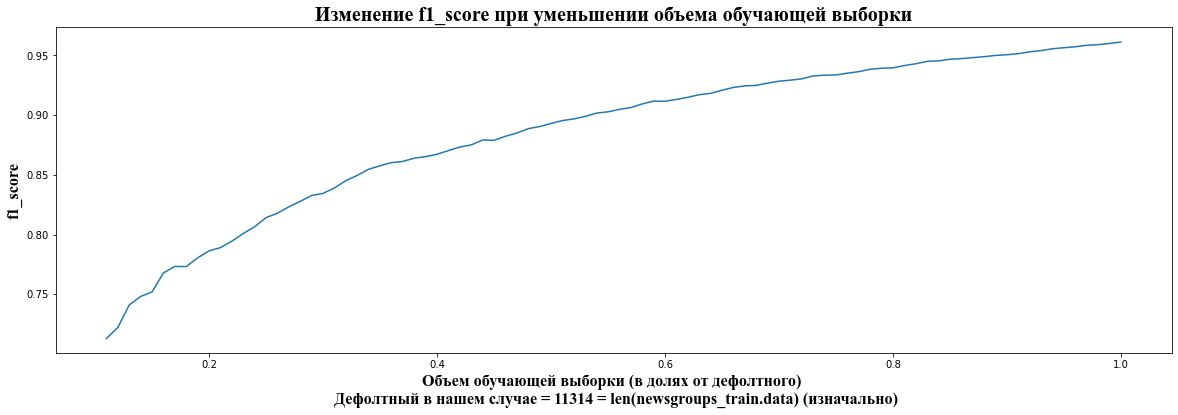

In [110]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(for_x, for_y)

ax.set_xlabel('Объем обучающей выборки (в долях от дефолтного) \n Дефолтный в нашем случае = 11314 = len(newsgroups_train.data) (изначально)', 
           {'fontname':'Times New Roman'}, 
           fontweight='bold', 
           fontsize=16
          )
ax.set_ylabel('f1_score', 
           {'fontname':'Times New Roman'}, 
           fontweight='bold', 
           fontsize=16
          )
ax.set_title('Изменение f1_score при уменьшении объема обучающей выборки', 
           {'fontname':'Times New Roman'}, 
           fontweight='bold', 
           fontsize=20
         )

plt.show()

# В качестве измерения эффективности был выбран параметр f1, как объединяющий recall и precision

9. Сделайте вывод о применимости модели.

Предположение, что с уменьшением обучающей выборки эффективность падает, подтвердился. При ее дефолтном размере (11314) мы достигаем показателя эффективности f1 около 96%, что довольно много. Так же если проанализировать таблицу всех метрик, то все показатели находятся от 89% и выше, а следовательно можно сделать вывод о том, что модель хорошо обучена. А следовательно, применима